202020893 박귀영 midterm pytorch

라이브러리 설치 및 임포트

In [40]:
# pytorchcv.py 파일 다운로드
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

# torchvision 및 필요한 라이브러리 설치
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv
%pip install tensorflow

# PyTorch 및 기타 라이브러리 임포트
import torch
import torchvision
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pytorchcv
import torchvision.transforms as transforms

6294.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2024-04-24 19:02:22--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.6’

pytorchcv.py.6      100%[===================>]   6.39K  --.-KB/s    in 0.001s  

2024-04-24 19:02:22 (9.04 MB/s) - ‘pytorchcv.py.6’ saved [6540/6540]



6300.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


6307.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


6314.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


6322.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


load_fashion_mnist 함수:
이 함수는 Fashion-MNIST 데이터셋을 다운로드하고 로드합니다.

train=True로 설정하여 훈련 데이터셋을 로드하고, train=False로 설정하여 테스트 데이터셋을 로드합니다.
다운로드된 데이터셋은 ToTensor() 변환을 적용하여 PyTorch 텐서로 변환됩니다.

torch.utils.data.DataLoader를 사용하여 데이터셋을 미니배치로 나누고 셔플링합니다.
훈련 데이터 로더와 테스트 데이터 로더를 반환합니다.

Fashion-MNIST 데이터셋 로드:
load_fashion_mnist 함수를 호출하여 훈련 데이터 로더와 테스트 데이터 로더를 가져옵니다.

데이터셋 탐색 및 분석:
훈련 데이터셋과 테스트 데이터셋의 샘플 수를 확인합니다.

next(iter(train_loader))를 사용하여 훈련 데이터셋에서 첫 번째 미니배치의 이미지와 레이블을 가져옵니다.
가져온 이미지의 모양과 레이블을 출력합니다.

클래스 레이블 분석:
Fashion-MNIST 데이터셋의 클래스 레이블을 정의합니다.

랜덤 샘플 이미지와 레이블 시각화:
25개의 랜덤 샘플 이미지와 해당 레이블을 시각화합니다.
각 이미지 위에는 해당하는 클래스 이름이 표시됩니다.

훈련 데이터셋에는 60,000개의 샘플이 있고, 테스트 데이터셋에는 10,000개의 샘플이 있습니다.
이미지 텐서의 모양은 (64, 1, 28, 28)입니다. 여기서 64는 배치 크기(batch size)를 나타내며, 1은 이미지의 채널(channel) 수를 의미합니다.
 Fashion-MNIST는 흑백 이미지이므로 채널 수가 1입니다. 그리고 이미지의 크기는 28x28입니다.
레이블(label)은 각 이미지의 클래스를 나타내는 숫자로 구성된 텐서입니다. 예를 들어, 첫 번째 이미지의 레이블은 1입니다. 
이것은 해당 이미지가 Fashion-MNIST 데이터셋의 클래스 중 하나를 나타내는 것임을 의미합니다.

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>
Number of training samples: 60000
Number of test samples: 10000
Shape of image tensor: torch.Size([64, 1, 28, 28])
Labels: tensor([5, 8, 0, 6, 7, 4, 9, 7, 7, 7, 9, 8, 7, 2, 1, 4, 4, 7, 2, 9, 8, 8, 3, 7,
        0, 5, 5, 7, 3, 6, 2, 6, 5, 3, 1, 0, 7, 1, 7, 6, 8, 8, 4, 2, 5, 5, 8, 0,
        6, 3, 1, 0, 8, 3, 2, 2, 9, 2, 5, 4, 8, 0, 9, 1])


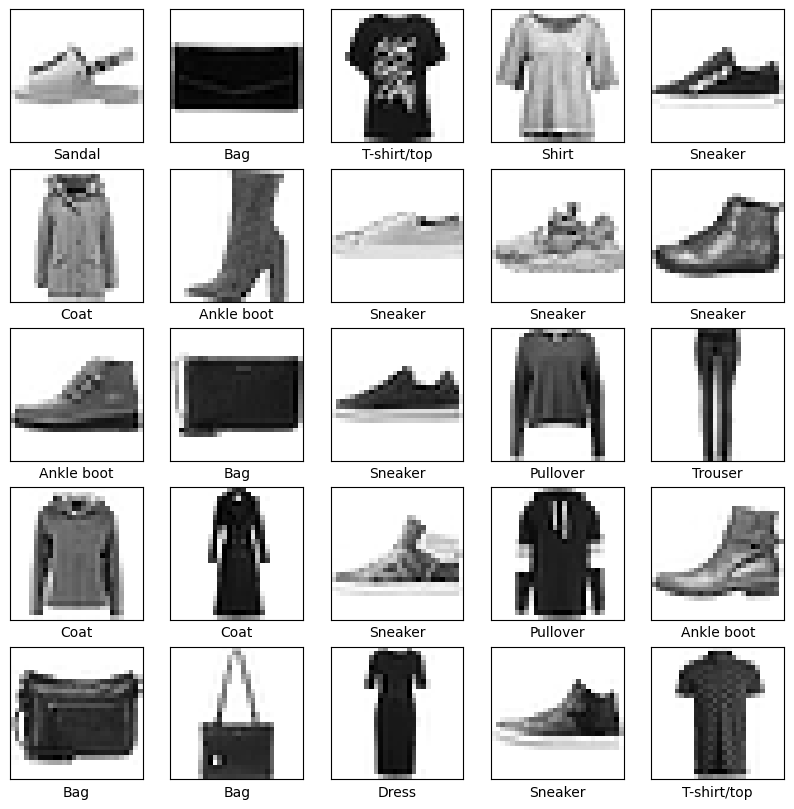

In [41]:
# Fashion-MNIST 데이터셋을 로드하는 함수 정의
def load_fashion_mnist(batch_size=64):
    # Fashion-MNIST 데이터셋을 './data' 디렉토리에 다운로드하고 로드
    train_data = torchvision.datasets.FashionMNIST('./data', download=True, train=True, transform=ToTensor())
    test_data = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=ToTensor())
    
    # 훈련 데이터 로더 생성
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # 테스트 데이터 로더 생성
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # 데이터셋 타입 출력 (훈련 및 테스트 데이터셋)
    print(type(train_data))
    print(type(test_data))
    
    return train_loader, test_loader

# Fashion-MNIST 데이터셋 로드
train_loader, test_loader = load_fashion_mnist()

# 데이터셋 탐색 및 분석
# 훈련 데이터셋의 크기 확인
num_train_samples = len(train_loader.dataset)
print("Number of training samples:", num_train_samples)

# 테스트 데이터셋의 크기 확인
num_test_samples = len(test_loader.dataset)
print("Number of test samples:", num_test_samples)

# 이미지 데이터의 형태 확인
sample_image, sample_label = next(iter(train_loader))
print("Shape of image tensor:", sample_image.shape)
print("Labels:", sample_label)

# 클래스 레이블 분석
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 랜덤 샘플 이미지와 레이블 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_image[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[sample_label[i]])
plt.show()

Layer (type):
첫 번째 열은 각 레이어의 유형을 나타냅니다. 여기서는 Conv2d(합성곱 레이어), Flatten(평탄화 레이어), Linear(완전 연결 레이어)가 사용되었습니다.

Output Shape:
두 번째 열은 각 레이어의 출력 형태를 나타냅니다. 예를 들어, Conv2d 레이어의 출력 형태는 [-1, 9, 24, 24]입니다. 여기서 -1은 배치 크기를 나타내며, 9는 채널 수를 나타내고, 24x24는 높이와 너비를 나타냅니다.

Param #:
세 번째 열은 각 레이어의 학습 가능한 파라미터의 수를 나타냅니다.

Total params:
모델의 총 학습 가능한 파라미터 수입니다.

Trainable params:
학습 가능한 파라미터의 총 수입니다. 이 값은 모델이 역전파(backpropagation)를 통해 업데이트되는 파라미터의 수를 나타냅니다.

Non-trainable params:
학습되지 않는 파라미터의 총 수입니다. 일부 레이어(예: BatchNormalization)는 학습 중에 업데이트되지 않는 파라미터를 가질 수 있습니다.

Input size (MB):
입력 데이터의 크기를 메가바이트 단위로 나타낸 것입니다.

Forward/backward pass size (MB):
Forward pass 및 backward pass에 필요한 메모리 크기입니다.

Params size (MB):
파라미터의 크기를 메가바이트 단위로 나타낸 것입니다.

Estimated Total Size (MB):
전체 모델의 메모리 사용량을 예상한 값입니다.


In [42]:
# 파이토치(PyTorch)를 사용하여 간단한 신경망 모델을 정의하고, 그 구조를 요약해서 출력하는 과정을 설명

import torch.nn as nn # 파이토치의 신경망 모듈(nn)을 임포트
%pip install torchsummary # 신경망 모델의 요약 정보를 제공하는 torchsummary 라이브러리를 설치
from torchsummary import summary # 설치된 torchsummary에서 summary 함수를 임포트

class OneConv(nn.Module): # nn.Module을 상속받는 OneConv라는 새로운 클래스를 정의하는데 nn.Module은 파이토치에서 모든 신경망 모듈의 기본 클래스
    def __init__(self): # 클래스의 생성자로, OneConv 객체가 생성될 때 초기화 과정을 정의
        super(OneConv, self).__init__() # 상위 클래스인 nn.Module의 생성자를 호출하여 클래스를 적절히 초기화
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5)) # 입력 채널이 1개, 출력 채널이 9개인 2D 컨볼루션 레이어를 정의하고, 이를 객체의 conv 속성으로 할당
        self.flatten = nn.Flatten() # 다차원 입력을 1차원 배열로 변환하는 Flatten 레이어를 정의하고, flatten 속성으로 할당
        self.fc = nn.Linear(5184,10) # 5,184개의 입력 특성을 10개의 출력 특성으로 변환하는 완전 연결 레이어(또는 선형 레이어)를 정의하고, fc 속성으로 할당

    def forward(self, x): # 모델의 순전파를 정의하는 메서드로 입력 텐서 x가 모델을 통과하는 과정을 설명
        if x.dim() == 5 and x.size(2) == 1:  # 입력 x의 차원이 예상치 못한 추가 차원을 포함하는 경우, 해당 차원을 제거
            x = x.squeeze(2)
        x = nn.functional.relu(self.conv(x)) # 정의된 컨볼루션 레이어를 입력 x에 적용한 후 ReLU 활성화 함수를 적용
        x = self.flatten(x) # ReLU의 출력을 flatten 레이어를 통해 평탄화
        x = nn.functional.log_softmax(self.fc(x),dim=1) # 평탄화된 벡터를 fc 레이어에 적용하고, 결과를 로그 소프트맥스 함수를 통해 처리하는데 이 함수는 다중 클래스 분류 문제에 대한 확률을 계산할 때 사용

        return x  # The final processed tensor x, which contains the log probabilities of the classes, is returned from the forward method. This output can be used by a loss function during training to compute the error and update the model weights

# Create an instance of the network
net = OneConv() # OneConv 클래스의 인스턴스를 생성

# Print the summary of the model
summary(net,input_size=(1,1,28,28)) # 생성된 모델 net의 요약 정보를 출력하는데 여기서 input_size는 모델이 기대하는 입력 데이터의 크기를 (채널 수, 높이, 너비) 형식으로 지정

6330.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 24, 24]             234
           Flatten-2                 [-1, 5184]               0
            Linear-3                   [-1, 10]          51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.20
Estimated Total Size (MB): 0.28
----------------------------------------------------------------


In [43]:
# PyTorch를 사용하여 신경망 모델을 학습하고 검증하는 과정을 구현

import torch # torch, torch.optim, torch.nn.functional 모듈을 임포트하는데 PyTorch에서 모델을 구성하고 최적화하는 데 필요한 함수와 클래스를 제공
from torch import optim
import torch.nn.functional as F

def train(model, train_loader, test_loader, epochs=5): # 함수를 정의하여 모델, 학습 데이터 로더, 테스트 데이터 로더, 그리고 에폭 수를 매개변수로 받음
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용하도록 설정
    model.to(device) # 모델을 해당 장치로 이동
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 최적화 도구를 사용하여 모델의 매개변수를 최적화하고, 학습률은 0.001로 설정
    criterion = torch.nn.CrossEntropyLoss() # 다중 클래스 분류를 위한 크로스 엔트로피 손실 함수를 사용
    
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'val_acc': [], 'val_loss': []}
    
    # 에폭 수만큼 반복하면서 모델의 학습 및 평가를 수행하는데 학습 시에는 model.train()을 호출하여 모델을 학습 모드로 설정하고, 평가 시에는 model.eval()을 호출하여 평가 모드로 설정

    try:
        for epoch in range(epochs):
            model.train()
            train_loss, train_correct, train_total = 0, 0, 0
            for data, target in train_loader: # # 각 배치 데이터에 대해 데이터와 타겟을 장치로 이동시킨 후, 최적화 도구를 이용해 그래디언트를 초기화하고, 모델을 통해 예측을 수행
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                
                if output is None:
                    print("Warning: Model output is None.")
                    continue
                
                loss = criterion(output, target) # 손실을 계산하고, 역전파를 통해 그래디언트를 계산한 다음, 최적화 도구로 매개변수를 업데이트
                if loss is None:
                    print("Warning: Loss computation returned None.")
                    continue
                
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() # 정확도와 손실을 기록하여 진행 상황을 모니터링
                _, predicted = torch.max(output.data, 1)
                train_total += target.size(0)
                train_correct += (predicted == target).sum().item()
            
            train_loss /= len(train_loader.dataset)
            train_acc = 100. * train_correct / train_total
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            
            model.eval()
            test_loss, test_correct, test_total = 0, 0, 0
            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    if output is None:
                        print("Warning: Model output is None during evaluation.")
                        continue
                    
                    loss = criterion(output, target)
                    if loss is None:
                        print("Warning: Loss computation returned None during evaluation.")
                        continue
                    
                    test_loss += loss.item()
                    _, predicted = torch.max(output.data, 1)
                    test_total += target.size(0)
                    test_correct += (predicted == target).sum().item()
            
            test_loss /= len(test_loader.dataset)
            test_acc = 100. * test_correct / test_total
            history['test_loss'].append(test_loss)
            history['test_acc'].append(test_acc)
            
            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
        
    except Exception as e: # 에러가 발생할 경우 처리하는데 에러 발생 시 해당 에러 메시지를 출력하고 None을 반환
        print(f"An error occurred: {e}")
        return None
    
    return history # 학습과 테스트 과정에서의 손실과 정확도를 기록한 history 딕셔너리를 반환



신경망 모데을 학습시키고 결과를 처리하는 과정

train함수를 이용해서 신경망 모델 net을 학습하고 결과를 처리한다.

train_loaer과 test_loader을 사용하고, epochs은 5로 학습을 수행한다.

hist를 통해 출력해서 그래프를 통한 결과를 보여준다.

train loss는 우하강, test loss도 의미있는 우하강 그래프를 보여준다.

train accuracy는 우상향, test loss도 중간에 한 번 꺽이는 우상향 그래프를 보여준다.

Epoch 1/5: Train Loss: 0.0074, Train Acc: 83.32%, Test Loss: 0.0061, Test Acc: 86.65%
Epoch 2/5: Train Loss: 0.0054, Train Acc: 87.91%, Test Loss: 0.0055, Test Acc: 87.85%
Epoch 3/5: Train Loss: 0.0048, Train Acc: 89.03%, Test Loss: 0.0054, Test Acc: 87.87%
Epoch 4/5: Train Loss: 0.0045, Train Acc: 89.94%, Test Loss: 0.0053, Test Acc: 88.10%
Epoch 5/5: Train Loss: 0.0042, Train Acc: 90.36%, Test Loss: 0.0050, Test Acc: 88.67%


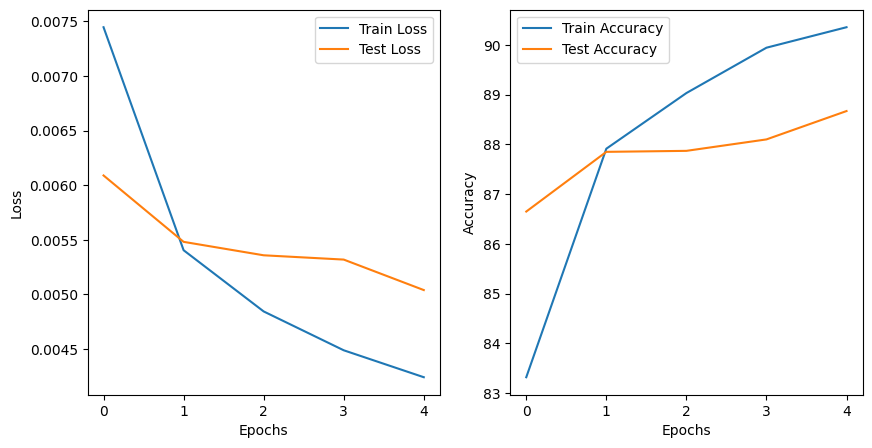

In [44]:
# 신경망 모델 net을 학습시키고 그 결과를 처리하는 과정을 보여줌

# train 함수를 호출하여 신경망 모델 net을 학습시키고 결과를 처리하는 과정을 수행합니다.
hist = train(net, train_loader, test_loader, epochs= 5)

if hist is None:
    # 만약 hist가 None인 경우, 학습이 실패했거나 예외가 처리되었음을 의미합니다.
    print("Training did not return any history.")
else:
    # hist가 None이 아닌 경우, 학습 결과를 시각화합니다.
    plot_results(hist)

각 에포크 단계마다 최종 정확도를 나타내고 있다.

Epoch 1/5:
첫 번째 에포크에서 훈련 과정이 진행됩니다.
1875개의 배치가 훈련되며, 각 배치는 약 2밀리초(ms) 소요됩니다.
정확도(accuracy)는 0.8614이고, 손실(loss)은 0.4712입니다.

Epoch 2/5:
두 번째 에포크에서 훈련 과정이 진행됩니다.
이전보다 더 높은 정확도(0.9572)와 낮은 손실(0.1487)을 보입니다.
1875개의 배치가 훈련되며, 각 배치는 약 2밀리초(ms) 소요됩니다.

Epoch 3/5, Epoch 4/5, Epoch 5/5:
세 번째, 네 번째, 다섯 번째 에포크에서도 훈련 과정이 진행됩니다.
각 에포크마다 정확도가 높아지고 손실이 감소하는 경향을 보입니다

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 데이터 준비 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. 신경망 아키텍처 설계
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(128, activation='relu'),  
    layers.Dropout(0.2),  
    layers.Dense(10, activation='softmax')  
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
model.fit(x_train, y_train, epochs=5)

# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.4876
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1489
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1060
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9729 - loss: 0.0872
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0712
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9715 - loss: 0.0904
Test accuracy: 0.9761000275611877


클래스 T-shirt/top: 1000개

클래스 Trouser: 1000개

클래스 Pullover: 935개

클래스 Dress: 283개

클래스 Coat: 998개

클래스 Sandal: 882개

클래스 Shirt: 864개

클래스 Sneaker: 1000개

클래스 Bag: 859개

클래스 Ankle boot: 1000개



위는 이 코드로 나타난 클래스 별 잘못 나타낸 수고, 결과를 보면 알 수 있듯이
Ankle boot, Sneaker, Trouser, T-shirt/top가 가장 잘못 분류 된 것을 알 수 있다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


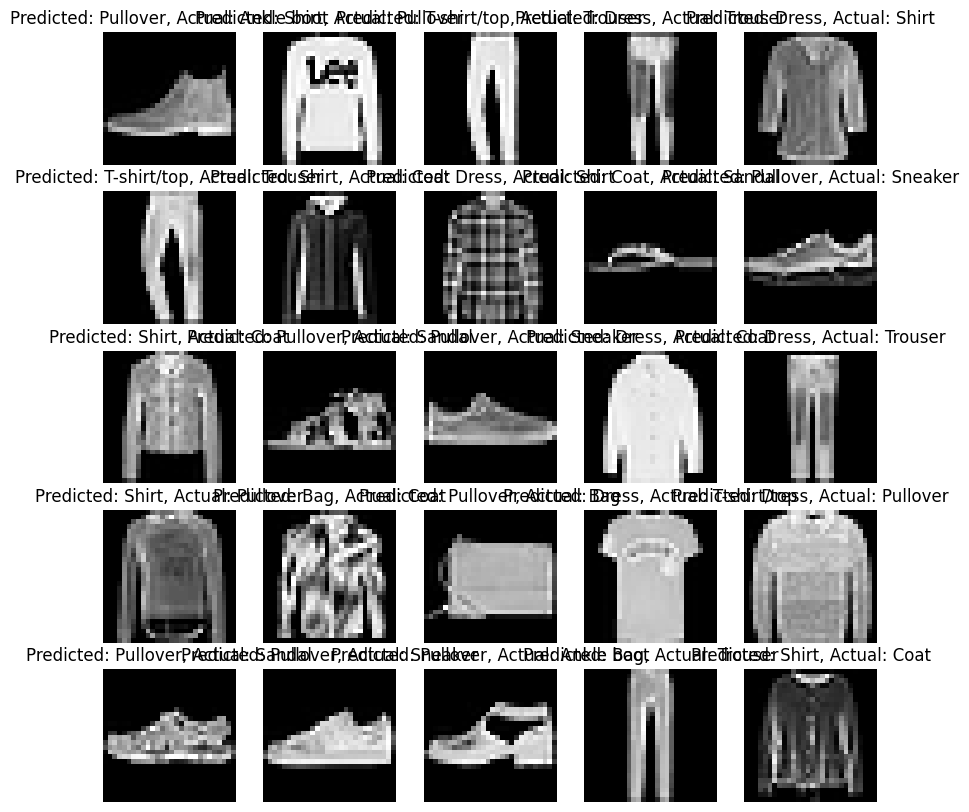

각 클래스 별 잘못 분류된 샘플 수:
클래스 T-shirt/top: 1000개
클래스 Trouser: 1000개
클래스 Pullover: 935개
클래스 Dress: 283개
클래스 Coat: 998개
클래스 Sandal: 882개
클래스 Shirt: 864개
클래스 Sneaker: 1000개
클래스 Bag: 859개
클래스 Ankle boot: 1000개


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1. 잘못 분류된 샘플 식별
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
misclassified_indices = np.where(predicted_classes != y_test)[0]

# 2. 잘못 분류된 샘플 시각화
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_classes[idx]]}, Actual: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()

# 3. 각 클래스 별로 잘못 분류된 샘플 수 계산
misclassified_counts = {i: 0 for i in range(10)}
for idx in misclassified_indices:
    actual_label = y_test[idx]
    misclassified_counts[actual_label] += 1

print("각 클래스 별 잘못 분류된 샘플 수:")
for class_label, count in misclassified_counts.items():
    print(f"클래스 {class_names[class_label]}: {count}개")